# Telecom Customer Churn

For this module examination, I would use data from Kaggle regarding Customer Churn Rate.

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)


In this exam, the maximum point is 100 with the criterion is shown below:
- The Coding Part would yield the maximum point of 30
- 5 Question with score of:
    - Q1 : 5 Point
    - Q2 : 5 Point
    - Q3 : 10 Point
    - Q4 : 5 Point
    - Q5 : 45 Point

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('Churn_ujian.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,4452-QIIEB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
# dfTrain.select_dtypes(exclude = 'object').columns
listItem = []

for col in data.select_dtypes(exclude = 'number').columns:
    listItem.append([col,data[col].value_counts().sum(),
                     data[col].nunique(),
                     data[col].value_counts().sort_values(ascending=False).index[0],
                     list(data[col].value_counts())[0]])
                     

df = pd.DataFrame(columns=['','count', 'unique', 'top', 'freq'], data=listItem)
df

,,count,unique,top,freq
0,customerID,7043,7043,3976-HXHCE,1
1,gender,7043,2,Male,3555
2,Partner,7043,2,No,3641
3,Dependents,7043,2,No,4933
4,PhoneService,7043,2,Yes,6361
5,MultipleLines,7043,3,No,3390
6,InternetService,7043,3,Fiber optic,3096
7,OnlineSecurity,7043,3,No,3498
8,OnlineBackup,7043,3,No,3088
9,DeviceProtection,7043,3,No,3095


In [8]:
items = {
    'dataFeatures' : [i for i in data.columns],
    'dataType' : [i for i in data.dtypes],
    'null' : [i for i in data.isnull().sum()],
    'nullPct' : [i for i in (data.isnull().sum() * 100 / len(data)).round(2)],
    'unique' : [i for i in data.nunique()],
    'uniqueSample' : [list(data[i].drop_duplicates().sample(2).values) for i in data.columns]
}

df1 = pd.DataFrame(items)
df1

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[7147-AYBAA, 2294-DMMUS]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[71, 62]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[No phone service, No]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[No, Yes]"


We have no missing value, but as we can see the column TotalCharges have an object data type but when we sampled it they had some numerical value. Let's try to convert this column data type to float

In [9]:
data_tc = data[data['TotalCharges'].str.contains(' ')]

In [10]:
data_tc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## Question 1
In your opinion, Why this datas filled with empty String? Is it related with another column?

Data Total Charge saya rasa memiliki empty string karena datanya object, jika numerical maka akan terisi int 0. saya melihat column TotalCharges adalah berhubungan dengan senior citizen yang memiliki value 0 (kaum muda), tenure yang memiliki value 0 (bisa hanya menyewa kurang dari sebulan atau tidak sama menyewa) dan memiliki value Churn NO

Try to replace this string value with 0 and convert the Total Charges to the float data type now

In [11]:
data['TotalCharges'].replace(' ', 0, inplace = True)

In [12]:
data[data['TotalCharges']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [13]:
data['TotalCharges'] = data['TotalCharges'].astype('float')
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


I find it interesting that some people still pay their bill via mailed check, lets try to filter the dataset to only get the data with Mailed check class from the PaymentMethod feature

In [14]:
data[data['PaymentMethod'] == 'Mailed check']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No


I am kinda curious, is there any difference between people who have partner or not for people who choose mailed check. Let's try to visualize this by using the countplot. I would also like to create a grid with the Payment Method as the columns to see the difference between each payment method.

Text(0.5, 1.0, 'Mailed Check Payment Method grouped by Partner')

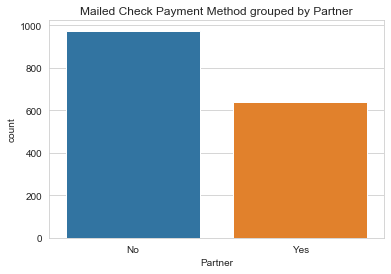

In [15]:
sns.countplot(data = data[data['PaymentMethod'] == 'Mailed check'], x = 'Partner' )
plt.title('Mailed Check Payment Method grouped by Partner')

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


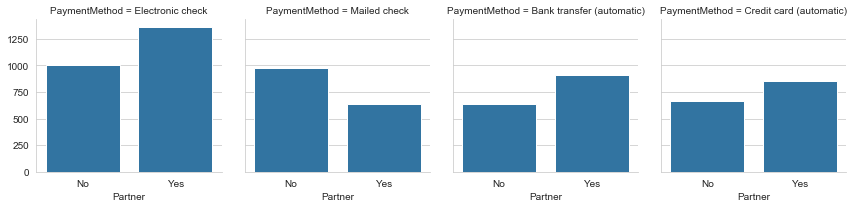

In [16]:
fi = sns.FacetGrid(data, col = 'PaymentMethod')
fi.map(sns.countplot, 'Partner')

Seems there is interesting finding that people who paid via Mailed Check are less likely to have partner compared to the other payment method. Let's try to use another feature to find any interesting finding, this time I would use the tenure feature with distribution plot. Just like before, I would create grid with different payment method as the columns.

In [17]:
df = data[data['PaymentMethod'] == 'Mailed check']

Text(0.5, 1.0, 'Tenure distribution with Mailed Check Payment Method')

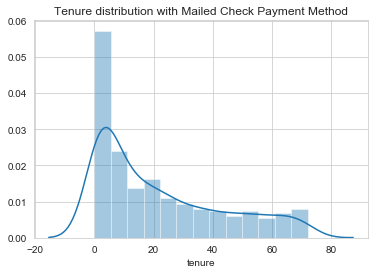

In [18]:
sns.distplot(df['tenure'])
plt.title('Tenure distribution with Mailed Check Payment Method')

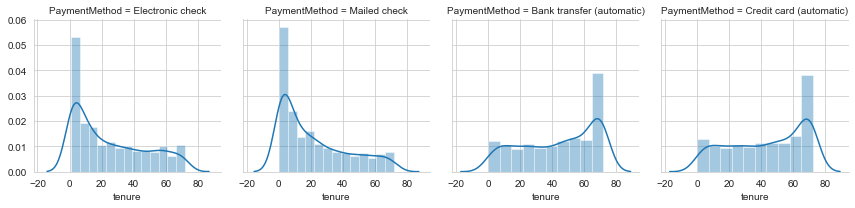

In [19]:
ab = sns.FacetGrid(data, col='PaymentMethod')
ab.map(sns.distplot, 'tenure')
plt.tight_layout()

## Question 2

From the plot above, what could you conclude about people who paid via mailed check? Also. is there any relationship between the tenure and partner column with the payment method?

That is enough EDA between feature, now let's focus to the our target (Churn). First, try to visualize the count of the Churn feature

Text(0.5, 1.0, 'Mailed Check Payment Method grouped by Partner')

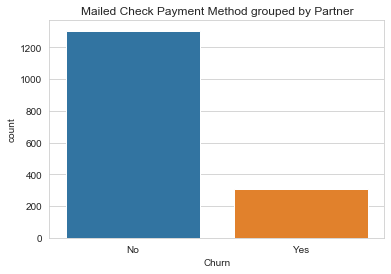

In [20]:
sns.countplot(data = data[data['PaymentMethod'] == 'Mailed check'], x = 'Churn' )
plt.title('Mailed Check Payment Method grouped by Partner')

It seems we have a case of imbalanced dataset for churn prediction. Let's try to visualize the distirbution for every category and numerical columns that we have. Before we proceed, replace the SeniorCitizen feature value with 0 as No and 1 as Yes.

*Note: if you use looping for showing all the plot, don't forget to add plt.show() after each iteration*

In [21]:
def senv(x):
    if x == 0:
        return 'No'
    else :
        return 'Yes'
data['SeniorCitizen'] = data['SeniorCitizen'].apply(senv)

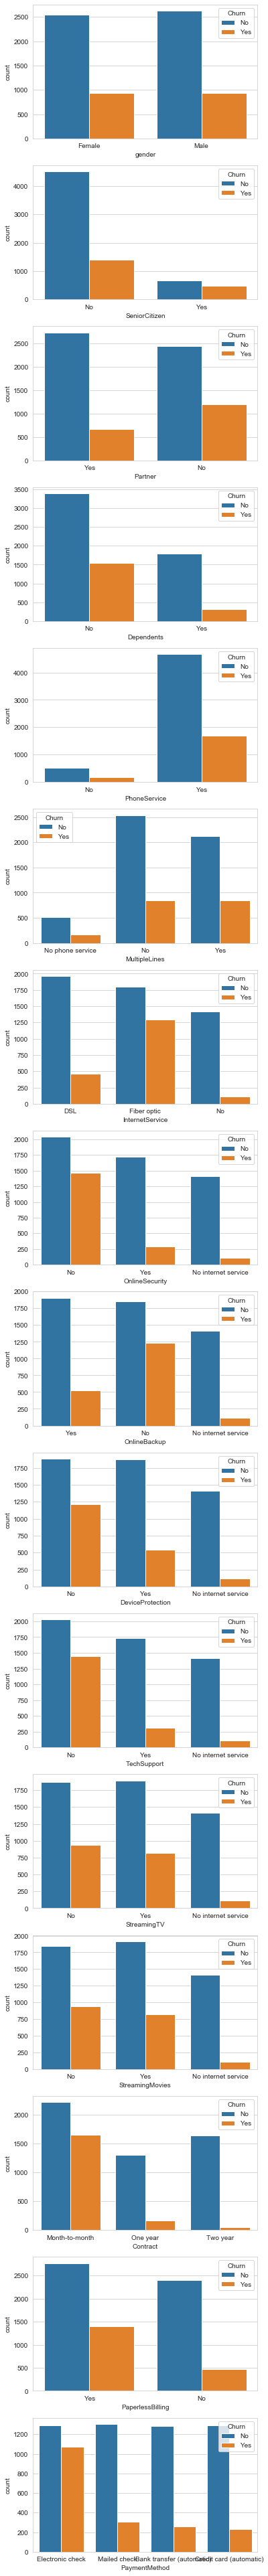

In [22]:
fig, axs = plt.subplots(16,figsize=(6,70))
sns.countplot(data=data, x='gender', hue='Churn', ax=axs[0])
sns.countplot(data=data, x='SeniorCitizen', hue='Churn', ax=axs[1])
sns.countplot(data=data, x='Partner', hue='Churn', ax=axs[2])
sns.countplot(data=data, x='Dependents', hue='Churn', ax=axs[3])
sns.countplot(data=data, x='PhoneService', hue='Churn', ax=axs[4])
sns.countplot(data=data, x='MultipleLines', hue='Churn', ax=axs[5])
sns.countplot(data=data, x='InternetService', hue='Churn', ax=axs[6])
sns.countplot(data=data, x='OnlineSecurity', hue='Churn', ax=axs[7])
sns.countplot(data=data, x='OnlineBackup', hue='Churn', ax=axs[8])
sns.countplot(data=data, x='DeviceProtection', hue='Churn', ax=axs[9])
sns.countplot(data=data, x='TechSupport', hue='Churn', ax=axs[10])
sns.countplot(data=data, x='StreamingTV', hue='Churn', ax=axs[11])
sns.countplot(data=data, x='StreamingMovies', hue='Churn', ax=axs[12])
sns.countplot(data=data, x='Contract', hue='Churn', ax=axs[13])
sns.countplot(data=data, x='PaperlessBilling', hue='Churn', ax=axs[14])
sns.countplot(data=data, x='PaymentMethod', hue='Churn', ax=axs[15])

In [23]:
# num_col = df.select_dtypes(exclude='O').columns

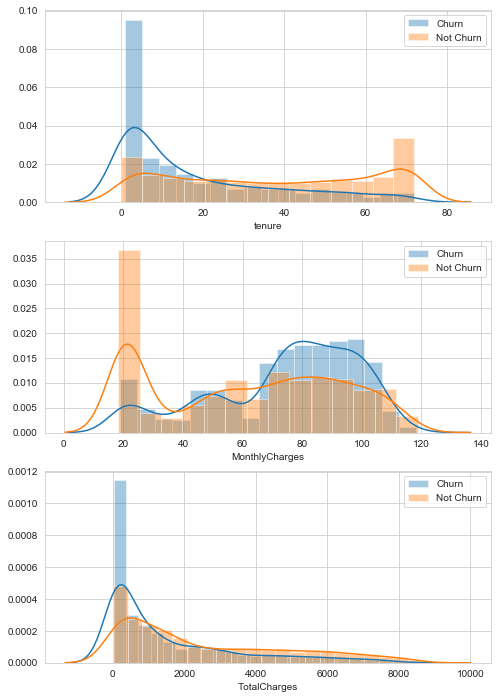

In [24]:
fig, axs = plt.subplots(3,figsize=(8,12))
sns.distplot(data[data['Churn']=='Yes']['tenure'], label='Churn', ax=axs[0])
sns.distplot(data[data['Churn']=='No']['tenure'], label='Not Churn', ax=axs[0])
sns.distplot(data[data['Churn']=='Yes']['MonthlyCharges'], label='Churn', ax=axs[1])
sns.distplot(data[data['Churn']=='No']['MonthlyCharges'], label='Not Churn', ax=axs[1])
sns.distplot(data[data['Churn']=='Yes']['TotalCharges'], label='Churn', ax=axs[2])
sns.distplot(data[data['Churn']=='No']['TotalCharges'], label='Not Churn', ax=axs[2])
axs[0].legend()
axs[1].legend()
axs[2].legend()

## Question 3

Is there any interesting insight that you could find from the plot above?

As our aim is to use machine learning for prediction, lets prepare our columns to be ready for machine learning activities. First, drop the CustomerID column then change all the category columns into numerical value by using get_dummies (OneHotEncoder) except the target column (Churn). Also, set the drop_first parameter as True.

At the same time, change the Churn feature value with No as 0 and Yes as 1

In [25]:
data.drop('customerID', axis = 1, inplace = True)
# data1 = pd.get_dummies(data, columns = categoricalList, drop_first = True)

In [26]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [27]:
categorical_columns = data.select_dtypes('object').columns

In [28]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [29]:
data1 = pd.get_dummies(data=X, columns = categorical_columns, drop_first = True)

In [30]:
data1.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
gender_Male                              7043 non-null uint8
SeniorCitizen_Yes                        7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

## Unsurpervised Modelling

Before we do any of the supervised modelling, let's do some data mining from our data. Remember, as lot of unsupervised model based on distance means that we need to rescale our data to have a same scale. 

In our case, we would use all the data except the target data for data mining. 

First, use the boxplot to check all the data distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

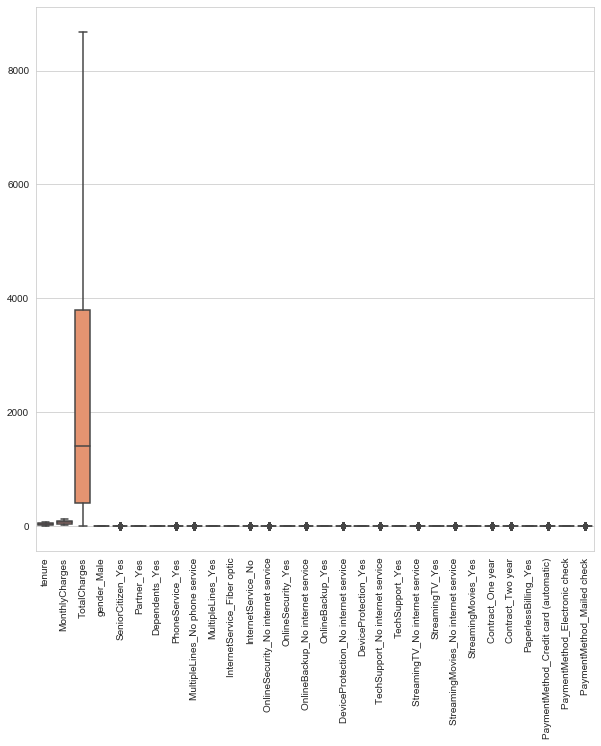

In [32]:
plt.figure(figsize = (10,10))
sns.boxplot(data = data1)
plt.xticks(rotation = 90)

In [33]:
from sklearn.preprocessing import StandardScaler
data_col = data1.copy()

In [34]:
scaler = StandardScaler()
data_col = pd.DataFrame(scaler.fit_transform(data_col), columns=data_col.columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

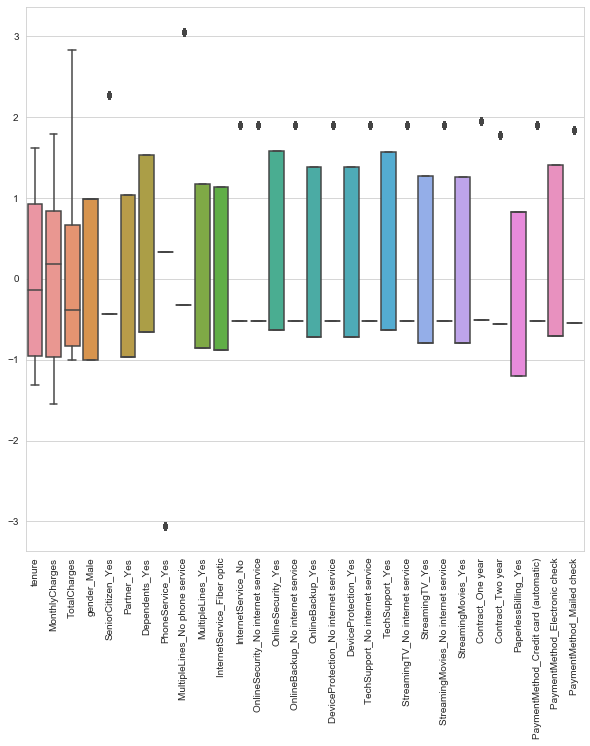

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_col)
plt.xticks(rotation=90)

We have lot of feature to be put into our unsupervised model, because of that let's use PCA to reduce our feature to 2 feature with random_state = 101. PC1 and PC2. 

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=101)

In [37]:
x_pca = pca.fit_transform(data_col)

In [38]:
x_pca = pd.DataFrame(x_pca, columns=['PC 1', 'PC 2'])
x_pca

,PC 1,PC 2
0,-0.432402,-3.150996
1,-0.204024,-0.794395
2,-0.160382,-2.089732
3,-0.898671,-0.878802
4,-0.613839,-3.175056
...,...,...
7038,-1.895955,1.301242
7039,-3.132402,3.147384
7040,-0.342003,-2.486629
7041,-0.616559,-2.049122


In [39]:
pca.explained_variance_ratio_

array([0.33179753, 0.11983851])

Our 2 PC only explained around 45 variance of the data, but we could just work with this data right now. Let's use the scatter plot to see the distribution of the 2 PC with the Churn feature as the hue

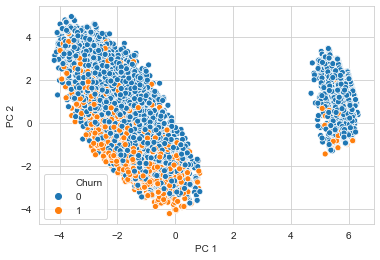

In [40]:
sns.scatterplot(x= 'PC 1', y = 'PC 2', hue = y, data = x_pca)

Seems our 2 PC resulting in the 2 different group, it is really interesting as it is not usable for separating our Churn feature but it might end up with another fascinating observation. 

Now, we would use KMeans, DBSCAN, and HDBSCAN to cluster our 2 PC. This time, I already done some analysis and find the best parameter we could use. Try to use the KMeans model with n_cluster = 2, DBSCAN model with eps = 0.4 and min_samples = 2, and HDBSCAN model with min_cluster_size =2 and min_samples = 25

Then create the scatter plot to compare the separation performance of each model. 

In [41]:
from sklearn.cluster import KMeans, DBSCAN
from hdbscan import HDBSCAN

In [42]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_pca[['PC 1', 'PC 2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
dbscan = DBSCAN(eps = 0.4, min_samples = 2)
dbscan.fit(x_pca[['PC 1', 'PC 2']])

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [44]:
hdbscan = HDBSCAN(min_cluster_size = 2, min_samples = 25)
hdbscan.fit(x_pca[['PC 1', 'PC 2']])

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=2, min_samples=25, p=None,
        prediction_data=False)

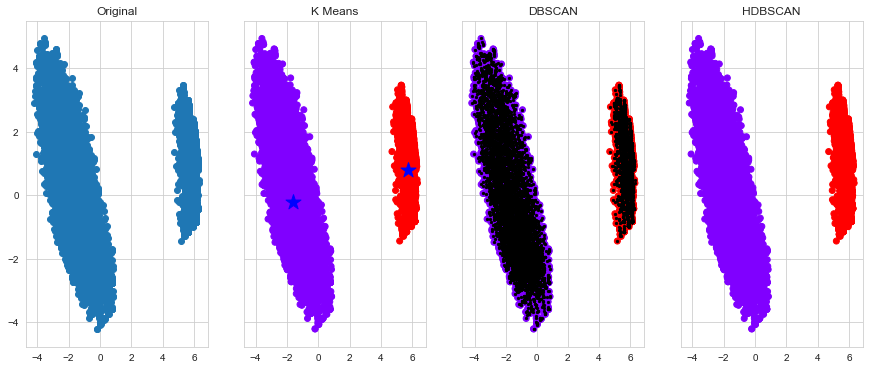

In [45]:
x_pca['KMeans'] = kmeans.labels_
x_pca['dbscan'] = dbscan.labels_
x_pca['hdbscan'] = hdbscan.labels_

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey = True, figsize = (15,6))

ax1.set_title('Original')
ax1.scatter(x_pca['PC 1'], x_pca['PC 2'])

centroids = kmeans.cluster_centers_
ax2.set_title('K Means')
ax2.scatter(x_pca['PC 1'], x_pca['PC 2'],c=x_pca['KMeans'],cmap='rainbow')
ax2.scatter(centroids[:,0], centroids[:,1], marker = '*', c= 'b', s=250)

core = dbscan.components_
ax3.set_title('DBSCAN')
ax3.scatter(x_pca['PC 1'], x_pca['PC 2'],c=x_pca['dbscan'], cmap = 'rainbow')
ax3.scatter(core[:,0], core[:,1], marker = 'o', c='black', s = 5)

ax4.set_title('HDBSCAN')
ax4.scatter(x_pca['PC 1'], x_pca['PC 2'],c=x_pca['hdbscan'], cmap = 'rainbow')

Seems all of our our model resulting in 2 different cluster, just like we expected. Now, return the label from the KMeans model back to the original data and use the pair plot to see the relation between the numerical value with the label as the hue (I am personally name it k-label

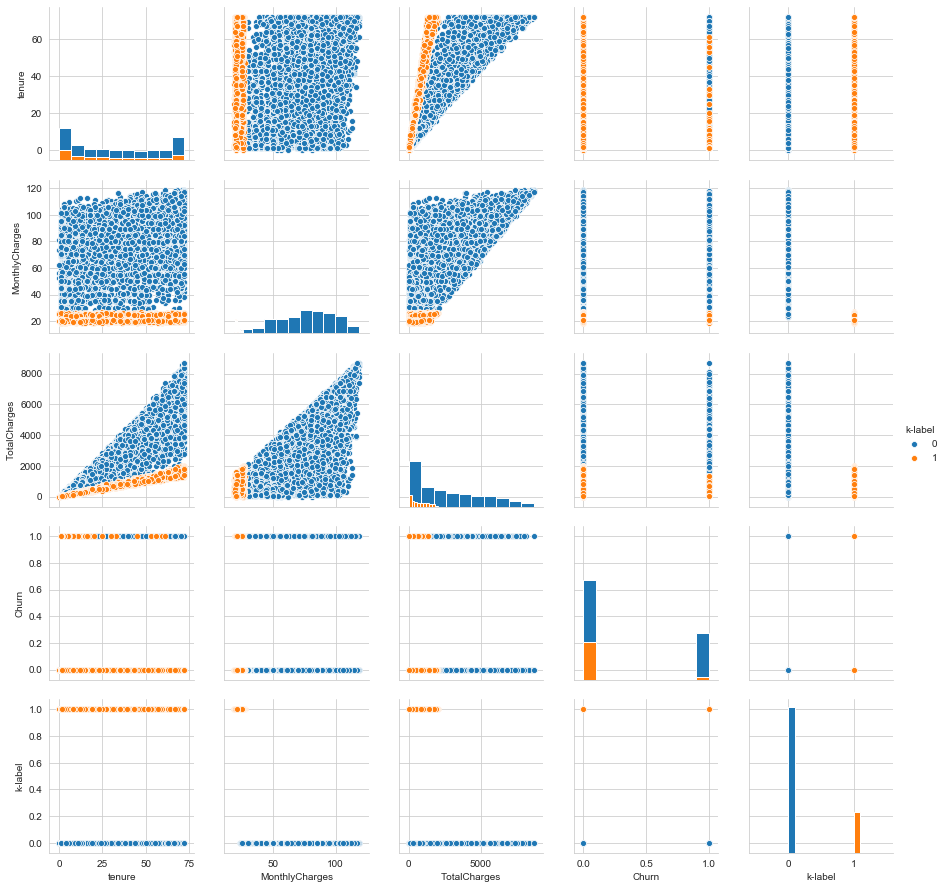

In [46]:
# data['k_label'] = kmeans.labels_
# data['k_label'] = data['k_label'].apply(lambda x: 1 if x==0 else 0)
# sns.pairplot(data[['tenure','MonthlyCharges','TotalCharges','Churn','k_label']], hue = 'k_label',diag_kind="hist")

# Tidak bisa memakai diag_kind=kde karena ada error, maka saya gunakan hist.
# data['k_label'] = kmeans.labels_
# data['k_label'] = data['k_label'].apply(lambda x: 1 if x==0 else 0)
# sns.pairplot(data[['tenure','MonthlyCharges','TotalCharges','Churn','k_label']], hue = 'k_label',diag_kind="kde")

data['k-label'] = x_pca['KMeans']
sns.pairplot(data[['tenure','MonthlyCharges','TotalCharges','Churn','k-label']], hue = 'k-label',diag_kind='hist')

## Question 4
Just strictly from the plot above, What kind of insight you could find there?

### Supervised Modelling

First, done the Train Test Split by using random_state=101 and test size =0.2

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.20, random_state=101)

If you remember, we have a case of data imbalance for our Churn feature. We could use SMOTE to try oversampling our data. In this time try use SMOTE to our x_train data but keep it in new variable so we would have 2 different kind of x_train; with and without oversampling.

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(sampling_strategy = 'minority')
oversampled_trainX, oversampled_trainY = smote.fit_sample(X_train, y_train)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 240 to 4959
Data columns (total 30 columns):
tenure                                   5634 non-null int64
MonthlyCharges                           5634 non-null float64
TotalCharges                             5634 non-null float64
gender_Male                              5634 non-null uint8
SeniorCitizen_Yes                        5634 non-null uint8
Partner_Yes                              5634 non-null uint8
Dependents_Yes                           5634 non-null uint8
PhoneService_Yes                         5634 non-null uint8
MultipleLines_No phone service           5634 non-null uint8
MultipleLines_Yes                        5634 non-null uint8
InternetService_Fiber optic              5634 non-null uint8
InternetService_No                       5634 non-null uint8
OnlineSecurity_No internet service       5634 non-null uint8
OnlineSecurity_Yes                       5634 non-null uint8
OnlineBackup_No internet service 

In [67]:
smote

SMOTE(k_neighbors=5, n_jobs=None, random_state=None,
      sampling_strategy='minority')

In [61]:
pd.DataFrame(oversampled_trainX)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,72,86.600000,6350.500000,0,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
1,72,115.800000,8476.500000,0,0,1,1,1,0,1,...,0,1,0,1,0,1,1,0,0,0
2,41,74.550000,3023.550000,1,0,1,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0
3,16,54.850000,916.150000,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,72,55.450000,4179.200000,1,0,1,1,0,1,0,...,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,21,81.140580,1720.390782,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
8292,4,78.920901,293.152732,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8293,36,84.039627,3065.600829,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8294,7,32.915047,225.675640,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
oversampled_trainX = pd.DataFrame(oversampled_trainX.astype('float64'), columns= X_train.columns)
oversampled_trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 30 columns):
tenure                                   8296 non-null float64
MonthlyCharges                           8296 non-null float64
TotalCharges                             8296 non-null float64
gender_Male                              8296 non-null float64
SeniorCitizen_Yes                        8296 non-null float64
Partner_Yes                              8296 non-null float64
Dependents_Yes                           8296 non-null float64
PhoneService_Yes                         8296 non-null float64
MultipleLines_No phone service           8296 non-null float64
MultipleLines_Yes                        8296 non-null float64
InternetService_Fiber optic              8296 non-null float64
InternetService_No                       8296 non-null float64
OnlineSecurity_No internet service       8296 non-null float64
OnlineSecurity_Yes                       8296 non-null float64
OnlineBacku

## Question 5

This time, I would leave the supervised modelling for the Churn feature to be up to you. I would give some criteria that was necessary to get the maximum points. The criteria included:

1. Aim for one of the metric of your choice (either the performance metrics optimization such as increasing the Accuracy, or lowering the loss function such as Log Loss). Give me your reason why you choose these metric. Just aim for one metric, you do not need to try optimize everything.

2. Compare 3 supervise model of your choice. Try to optimize your metric for these 3 model by hyperparameter tuning and use it on both the oversampled data and normal one. Compare the model if there is a difference If you use the oversampled data or not. Then choose to work with the data that you think is the best. If you feel the model of your choice could not be optimized again, then choose the best model with the best hyperparameter. You do not need to really aim for the best model, but I want to see if you know the step of optimizing model and done hyperparameter tuning. We do not need to work on Feature Engineering for this time.

3. From your choice of model and data, use the Feature Importance method to see which feature that affecting the Churn feature. Explain what is your finding. There might be some randomness because of the method, but just try to explain from what the plot is showing. 

4. Lastly, try to see if your model stable or not by using the K-Fold and CV method, as well as to try find the best training size by using the learning curve method. Use all your data again (the data you use for train test split).It does not matter if you model work is based on the oversampled data or not, just use the model base on the complete data (Once again, (the data you use for train test split).

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, roc_auc_score, log_loss, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# 1. Logistic Regression

## Data Dummies

In [78]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
print(classification_report(y_test,lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.68      0.51      0.58       383

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



## Data Scaller

In [58]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_col, y, test_size=0.20, random_state=101)

In [59]:
lr_model1 = LogisticRegression()
lr_model1.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
print(classification_report(y_test1,lr_model1.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1026
           1       0.66      0.52      0.58       383

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [64]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_pca, y, test_size=0.20, random_state=101)

##  Data PCA

In [65]:
lr_model2 = LogisticRegression()
lr_model2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
print(classification_report(y_test2,lr_model2.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1026
           1       0.64      0.42      0.50       383

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



# oversampled data

In [75]:
lr_model.fit(oversampled_trainX,oversampled_trainY)

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
print(classification_report(y_test,lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1026
           1       0.56      0.64      0.60       383

    accuracy                           0.76      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.76      0.77      1409



#### Dari percobaan menggunakan Data Dummies , Data PCA, Data Scaller, dan OverSampled. 
#### Saya melihat data Dummies memiliki precision, recall, dan accuracy yang lebih baik.
#### Maka saya mengggunakan model Dummies untuk di GridSearch

## GridSearch CV 

In [77]:
from sklearn.model_selection import GridSearchCV

In [80]:
search = GridSearchCV(estimator = lr_model,
                      param_grid = {
                          'penalty': ['l1', 'l2'],
                          'C': [0.001, 0.01, 0.1, 1],
                          'max_iter' : [100,200,500]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)

In [81]:
search.fit(X_train, y_train)

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [82]:
print(search.best_params_)
print(search.best_score_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.8059971536687887


In [83]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.68      0.51      0.58       383

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# 2. Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1026
           1       0.62      0.42      0.50       383

    accuracy                           0.77      1409
   macro avg       0.71      0.66      0.68      1409
weighted avg       0.76      0.77      0.76      1409



### GridSearchCV

In [86]:
search = GridSearchCV(estimator = rfc,
                      param_grid = {
                          'n_estimators': [100, 200],
                          'bootstrap': [True, False],
                          'min_samples_split': [10, 20]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'bootstrap': True, 'min_samples_split': 20, 'n_estimators': 200}
0.8059984145021047


In [87]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1026
           1       0.68      0.44      0.53       383

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### RandomizedSearchCV

In [88]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of features to consider at every splot
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start=100, stop=1000, num=100)]

# Minimum number of samples required at each leaf node
min_samples_leaf = max_depth = [int(x) for x in np.linspace(10,110, num=11)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [89]:
rf_random = RandomizedSearchCV (estimator = rfc,
                                param_distributions = random_grid,
                                n_iter = 10,
                                cv = 3,
                                n_jobs = -1,
                                scoring = 'accuracy')

In [90]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [91]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 172,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [92]:
print(classification_report(y_test,rf_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1026
           1       0.70      0.47      0.56       383

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### oversample

In [106]:
rfc.fit(oversampled_trainX,oversampled_trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1026
           1       0.56      0.55      0.56       383

    accuracy                           0.76      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.76      0.76      1409



In [108]:
search = GridSearchCV(estimator = rfc,
                      param_grid = {
                          'n_estimators': [100, 200],
                          'bootstrap': [True, False],
                          'min_samples_split': [10, 20]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
search.fit(oversampled_trainX,oversampled_trainY)
print(search.best_params_)
print(search.best_score_)

{'bootstrap': False, 'min_samples_split': 10, 'n_estimators': 200}
0.8363190919192138


In [109]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1026
           1       0.57      0.56      0.57       383

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.77      0.76      1409



In [110]:
rf_random.fit(oversampled_trainX,oversampled_trainY)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [111]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 227,
 'min_samples_leaf': 80,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [112]:
print(classification_report(y_test,rf_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1026
           1       0.56      0.67      0.61       383

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.78      0.77      0.77      1409



# 3. XGBOOST

In [94]:
from xgboost import XGBClassifier

In [95]:
xgboost = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [96]:
print(classification_report(y_test, xgboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1026
           1       0.66      0.47      0.55       383

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [99]:
xgboost = XGBClassifier()

param_grid = {
    'n_estimators' : [100, 200,],
    'learning_rate' : np.linspace(0.01, 0.1, 3),
}

search = GridSearchCV(estimator = xgboost, param_grid = param_grid, scoring = 'accuracy', cv = 5, n_jobs=-1)
search.fit(X_train,y_train)
print(search.best_params_)

{'learning_rate': 0.01, 'n_estimators': 200}


In [100]:
print(classification_report(y_test,search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1026
           1       0.68      0.48      0.56       383

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### Oversampled

In [113]:
xgboost.fit(oversampled_trainX,oversampled_trainY)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [114]:
print(classification_report(y_test, xgboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1026
           1       0.55      0.53      0.54       383

    accuracy                           0.75      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.75      0.75      0.75      1409



In [115]:
xgboost = XGBClassifier()

param_grid = {
    'n_estimators' : [100, 200,],
    'learning_rate' : np.linspace(0.01, 0.1, 3),
}

search = GridSearchCV(estimator = xgboost, param_grid = param_grid, scoring = 'accuracy', cv = 5, n_jobs=-1)
search.fit(oversampled_trainX,oversampled_trainY)
print(search.best_params_)

{'learning_rate': 0.1, 'n_estimators': 200}


In [116]:
print(classification_report(y_test,search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1026
           1       0.55      0.54      0.54       383

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.75      0.76      0.76      1409



# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [102]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
predictions = dtree.predict(X_test)

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1026
           1       0.46      0.47      0.46       383

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



## Menurut saya model yang paling bagus Random Forest Classifier (Oversampled), Dan Hyperparameter Berdasarkan RandomizedSearchCV


{'n_estimators': 1200,
 'min_samples_split': 227,
 'min_samples_leaf': 80,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [134]:
rfc1 = RandomForestClassifier(n_estimators= 1200, min_samples_split= 227, min_samples_leaf = 80, max_features= 'auto', max_depth=40, bootstrap= False)

In [135]:
print(classification_report(y_test,rf_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1026
           1       0.56      0.67      0.61       383

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.78      0.77      0.77      1409



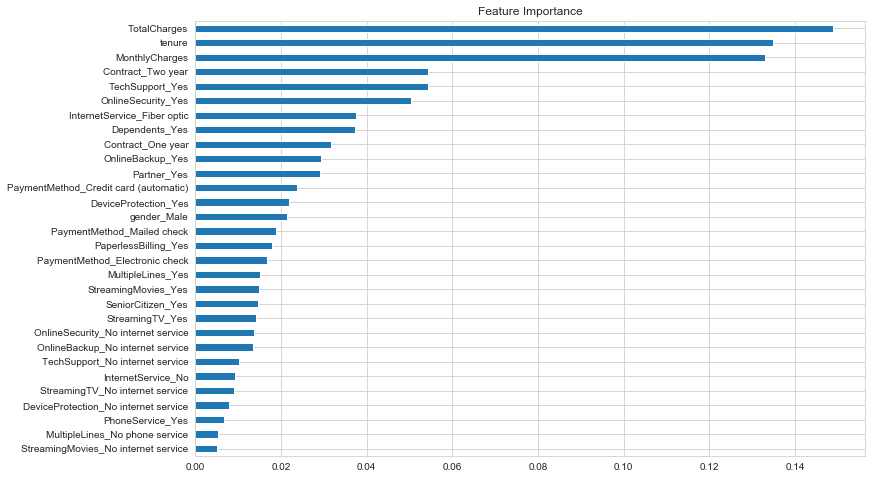

In [125]:
plt.figure(figsize=(12,8))
coef1 = pd.Series(rfc.feature_importances_, data1.columns).sort_values(ascending = True)
coef1.plot(kind = 'barh', title = 'Feature Importance')

# Model Evaluation KFold

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 1200, min_samples_split= 227, min_samples_leaf = 80, max_features= 'auto', max_depth=40, bootstrap= False)

In [139]:
def calc_train_error(X_train, y_train, model):    
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average = 'macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return {
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average = 'macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return {
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [141]:
from sklearn.model_selection import KFold
K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 42)

In [142]:
train_errors = []
validation_errors =[]
for train_index, val_index, in kf.split(data1, y):
    
    #split data
    X_train, X_val = data1.iloc[train_index], data1.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    #Oversampling
    sm = SMOTE(sampling_strategy='minority')
    X_train, y_train = sm.fit_sample(X_train, y_train)
    
    #instantiate model
    logmodel = RandomForestClassifier(bootstrap=True, min_samples_split= 20,n_estimators=350, min_samples_leaf=10,class_weight='balanced')
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [143]:
matrix = []
for i, j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'],
                   j['roc'], i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 
                                              'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                       'Test Matthews Corr Coef' , 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')    
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation 

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.861677,0.802837,0.941755,0.866242,0.861591,0.765912,0.724251,0.537513,0.333909,0.422096
2 Iteration,0.859940,0.787234,0.942027,0.842333,0.859879,0.746364,0.720507,0.509503,0.332931,0.447164
3 Iteration,0.864240,0.756028,0.943857,0.835702,0.864202,0.712245,0.728886,0.427432,0.328618,0.461765
4 Iteration,0.859742,0.796875,0.941882,0.866357,0.859671,0.757725,0.720213,0.536637,0.333385,0.430455
5 Iteration,0.859653,0.771307,0.943818,0.827156,0.859571,0.725723,0.720151,0.453539,0.329590,0.474538
6 Iteration,0.862690,0.778409,0.942880,0.830613,0.862561,0.732366,0.726750,0.468381,0.330698,0.460336
7 Iteration,0.864465,0.788352,0.943450,0.831520,0.864394,0.744738,0.729699,0.492485,0.329871,0.455196
8 Iteration,0.864174,0.758523,0.942927,0.822347,0.864110,0.709173,0.729035,0.427322,0.330442,0.471388
9 Iteration,0.861869,0.768466,0.943034,0.829318,0.861811,0.715825,0.724342,0.435538,0.329885,0.453688
10 Iteration,0.860052,0.774148,0.942483,0.832801,0.860001,0.716709,0.720628,0.441967,0.331597,0.443124


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X=data1,
                                                       y=y,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print('train_scores:\n')
print(train_scores)
print('test_scores:\n')
print(test_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()